In [319]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import pandas as pd
import bikes
import warnings
from pmdarima import auto_arima
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data_dict = {}
for year in ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']:
    data_dict[year] = bikes.data_by_date(year)

In [4]:
master = pd.DataFrame()
for year in data_dict:
    master = pd.concat([master, data_dict[year]])

In [7]:
master.index = pd.to_datetime(master.index)

In [8]:
master.to_csv('master.csv')

In [325]:
master = pd.read_csv('master.csv')

In [326]:
master.set_index('date_of_trip', inplace = True)

In [327]:
master.index = pd.to_datetime(master.index)

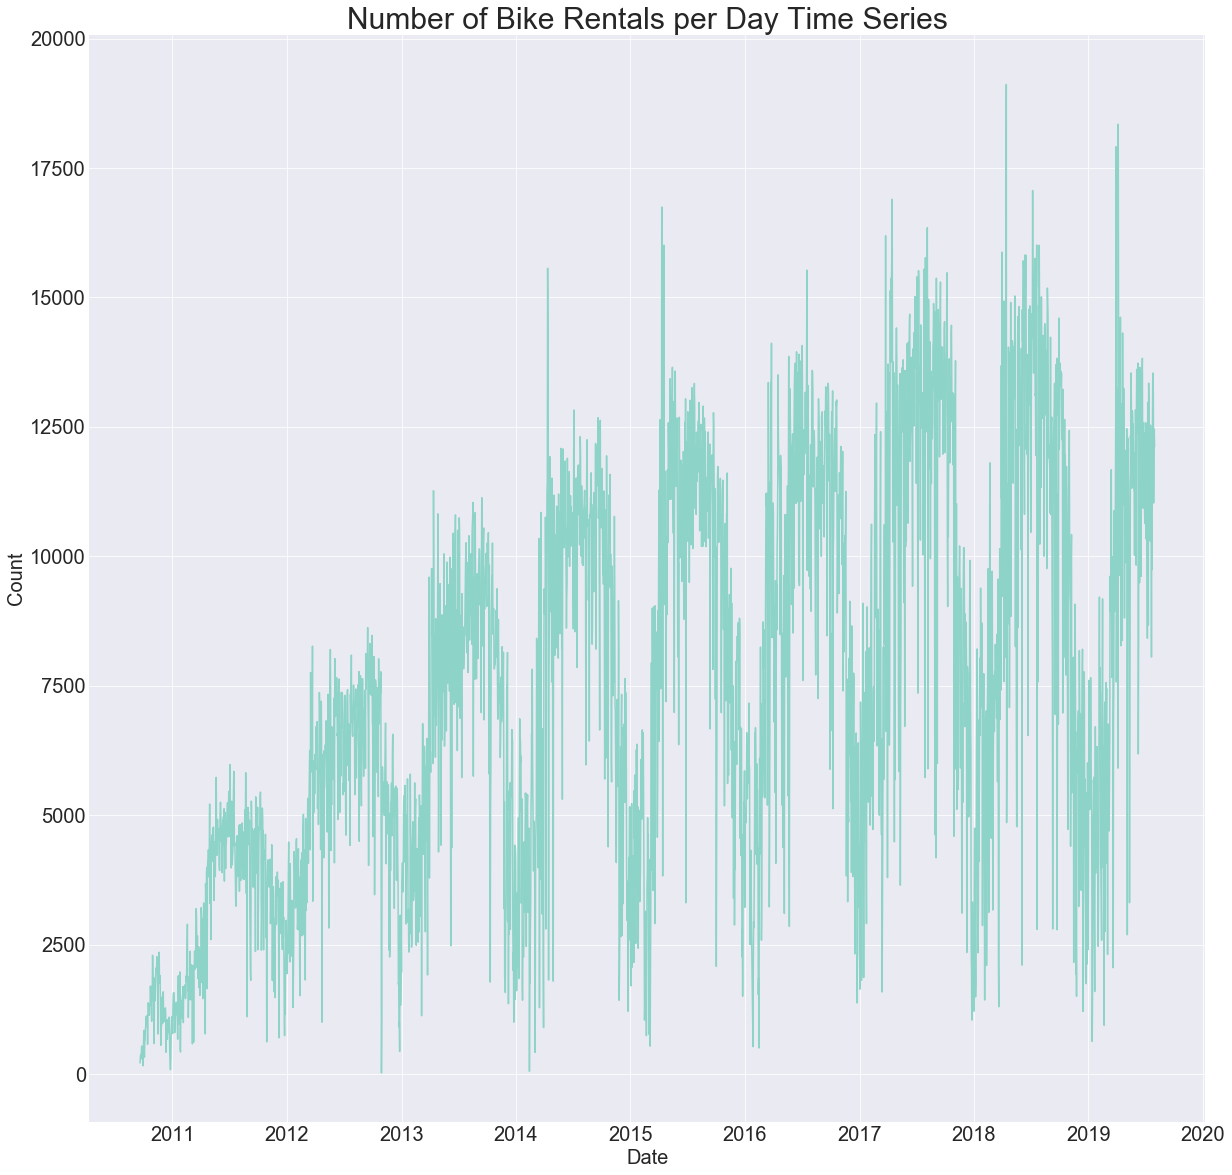

In [328]:
fig = plt.figure(figsize = (20,20))
plt.plot(master)
plt.xlabel('Date', fontsize = 20);
plt.ylabel('Count', fontsize = 20);
plt.xticks(fontsize = 20);
plt.yticks(fontsize = 20);
plt.title('Number of Bike Rentals per Day Time Series', fontsize = 30);

In [329]:
master_w = master.resample('w').sum()
print(len(master_w))
master_w.tail()

463


,count
date_of_trip,
2019-07-07,78441
2019-07-14,79866
2019-07-21,77807
2019-07-28,83806
2019-08-04,36725


In [330]:
master_w.drop(index = pd.to_datetime('2019-08-04'), inplace = True)

In [331]:
master_w.tail()

,count
date_of_trip,
2019-06-30,80523
2019-07-07,78441
2019-07-14,79866
2019-07-21,77807
2019-07-28,83806


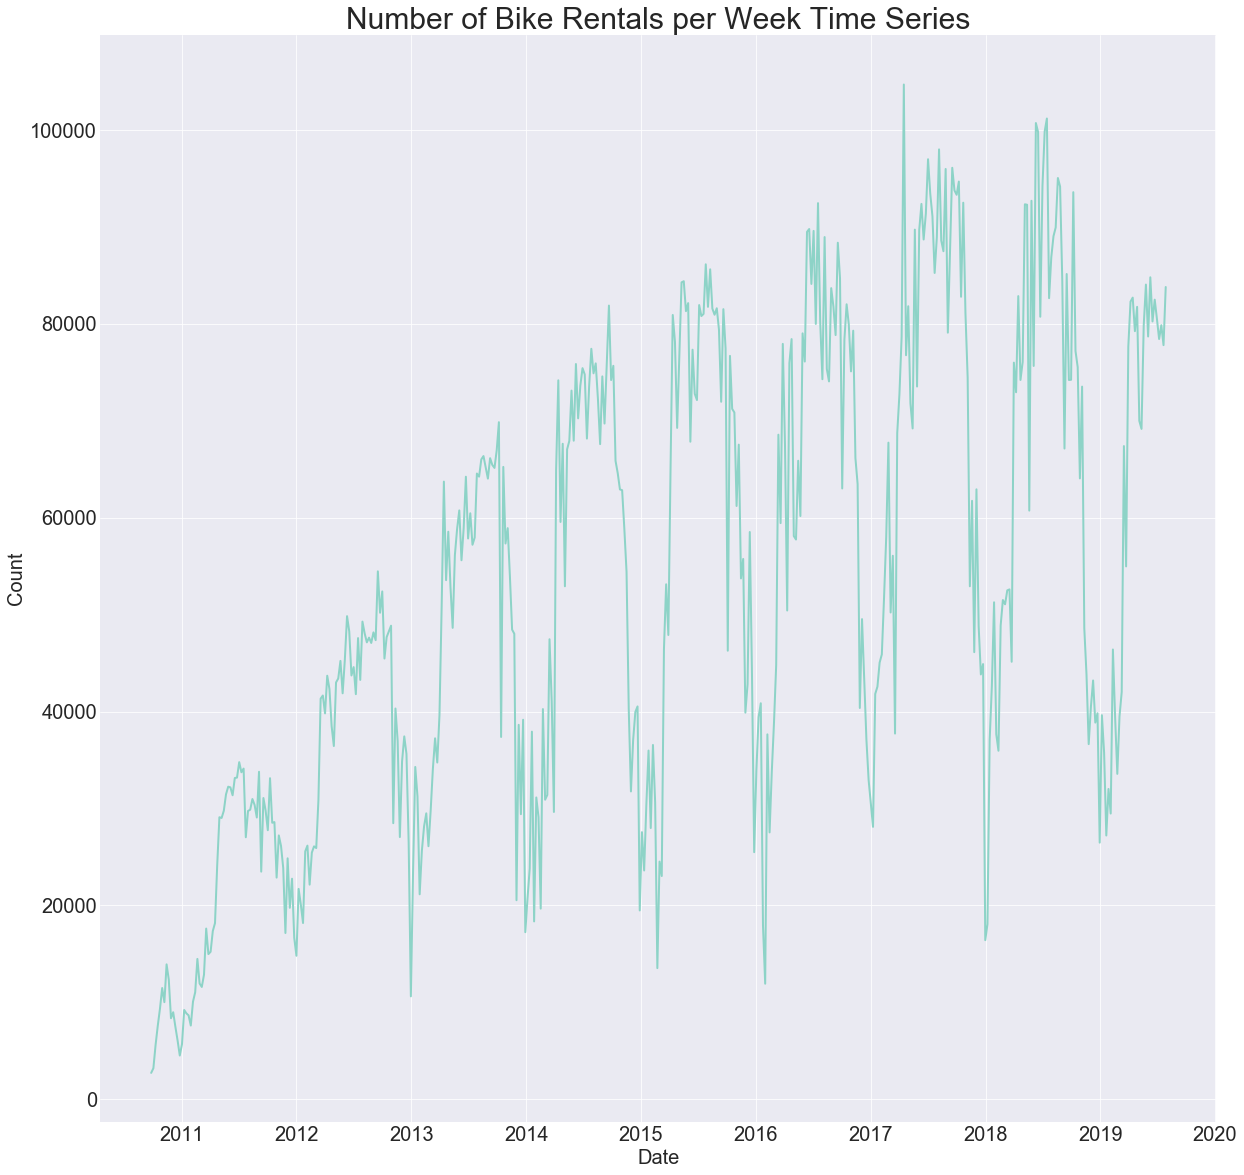

In [332]:
fig = plt.figure(figsize = (20,20))
plt.plot(master_w, lw = 2)
plt.xlabel('Date', fontsize = 20);
plt.ylabel('Count', fontsize = 20);
plt.xticks(fontsize = 20);
plt.yticks(fontsize = 20);
plt.title('Number of Bike Rentals per Week Time Series', fontsize = 30);

<Figure size 432x288 with 0 Axes>

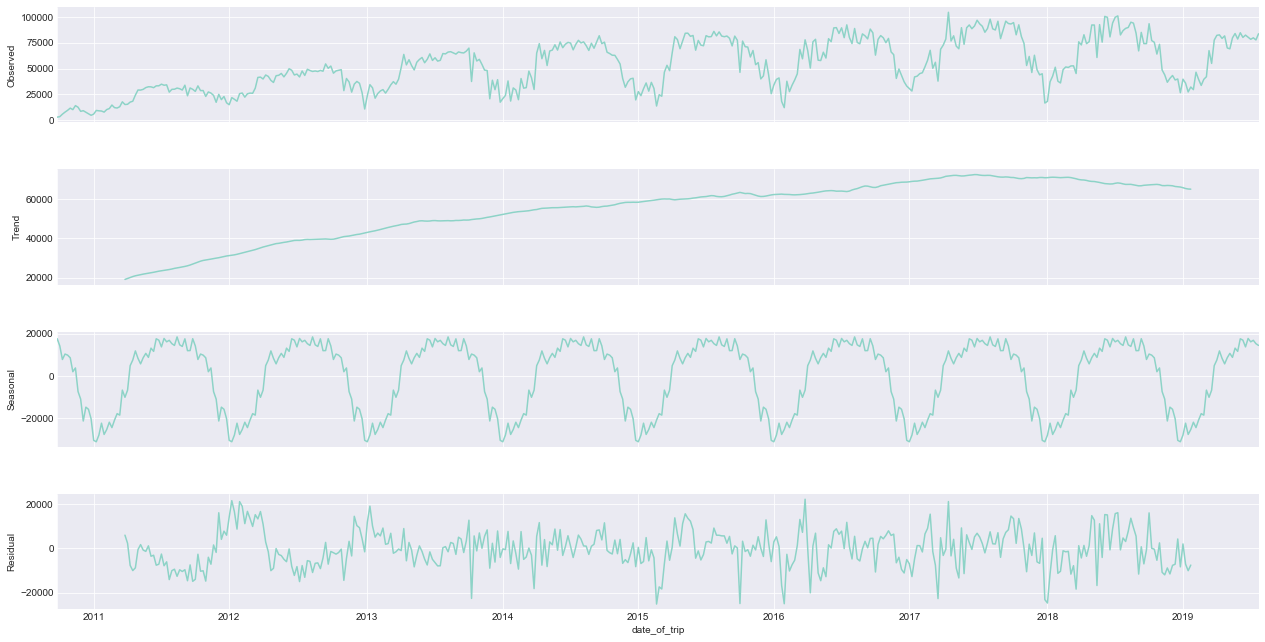

In [51]:
decomposition = seasonal_decompose(master_w)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(20, 10)

In [333]:
TRAIN = .7
train_index = int(len(master_w)*TRAIN) + 1
train_w = master_w.iloc[:train_index]
test_w = master_w.iloc[train_index:]
print(len(train_w))
print(len(test_w))

324
138


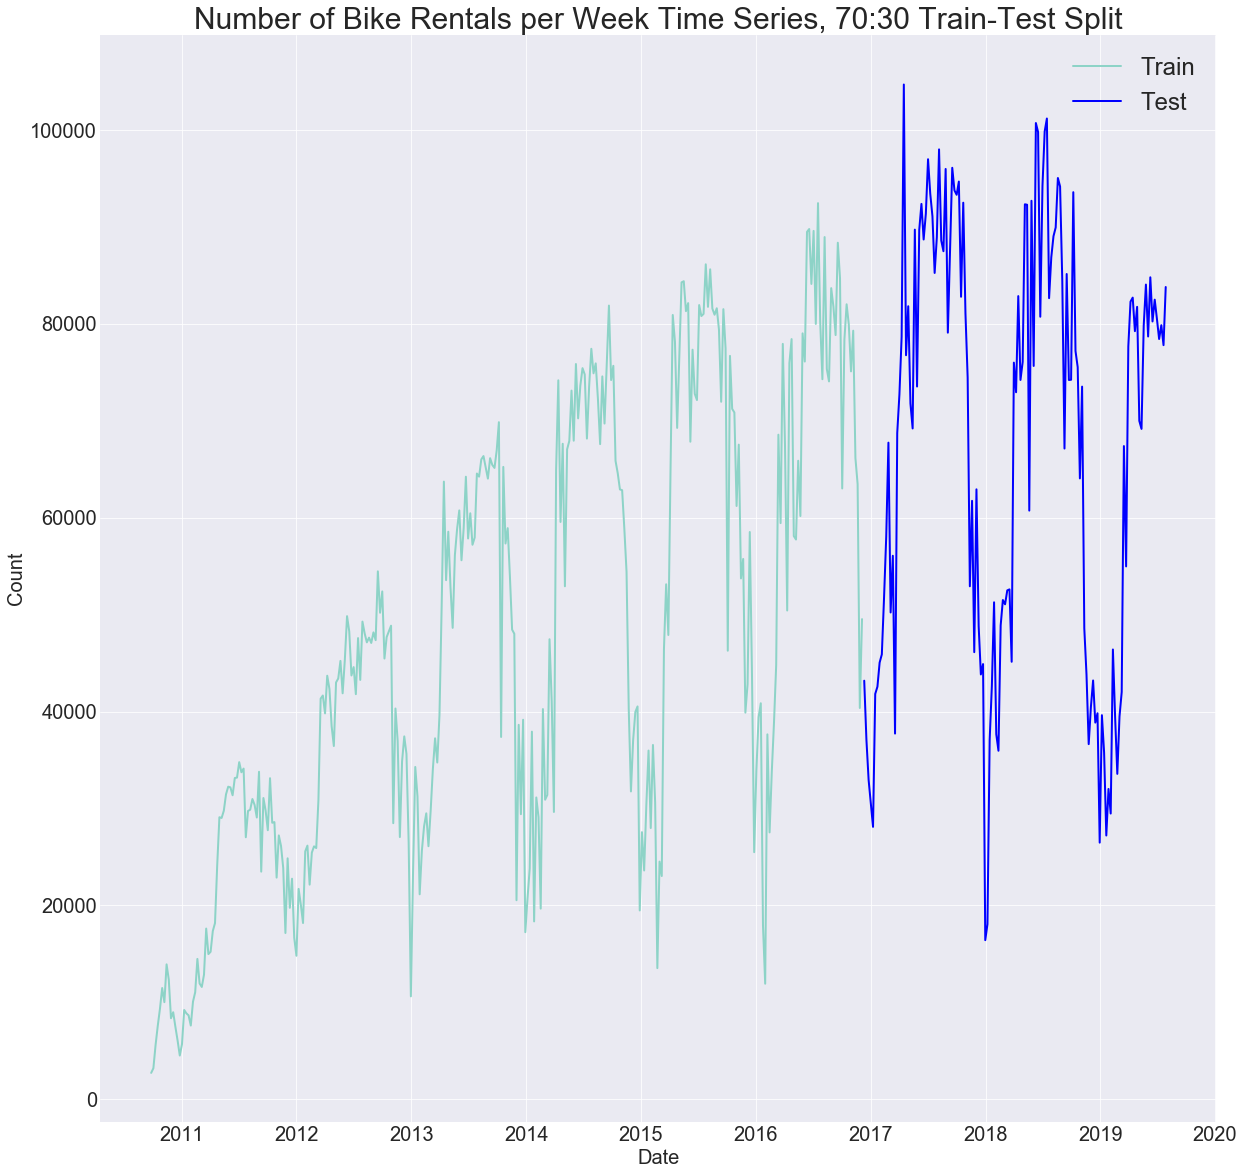

In [334]:
fig = plt.figure(figsize = (20,20))
plt.plot(train_w, lw = 2)
plt.plot(test_w, lw = 2, color = 'blue')
plt.xlabel('Date', fontsize = 20);
plt.ylabel('Count', fontsize = 20);
plt.xticks(fontsize = 20);
plt.yticks(fontsize = 20);
plt.legend(['Train','Test'],prop={'size': 24})

plt.title('Number of Bike Rentals per Week Time Series, 70:30 Train-Test Split', fontsize = 30);

In [240]:
automodel_d0_D0 = auto_arima(train_w['count'], start_p=0, start_q=0, max_p=3, max_q=3, m=52,start_P=0, seasonal=True,
                                            d=0, D=0, trace=True, error_action='ignore',suppress_warnings=True,
                                            stepwise=True)

Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 1, 52); AIC=7313.166, BIC=7324.508, Fit time=1.130 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 52); AIC=7433.759, BIC=7441.320, Fit time=0.014 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 52); AIC=6797.448, BIC=6812.571, Fit time=2.959 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 52); AIC=7218.860, BIC=7233.983, Fit time=1.467 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 52); AIC=6814.193, BIC=6825.535, Fit time=0.043 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 0, 0, 52); AIC=6799.439, BIC=6818.343, Fit time=9.367 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 1, 52); AIC=6799.240, BIC=6818.144, Fit time=3.260 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 0, 1, 52); AIC=6800.891, BIC=6823.576, Fit time=28.963 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(1, 0, 0, 52); AIC=7412.973, BIC=7424.315, Fit time=1.752 seconds
Fit ARIMA: order=(2, 0, 0) 

In [241]:
automodel_d1_D0 = auto_arima(train_w['count'], start_p=0, start_q=0, max_p=3, max_q=3, m=52,start_P=0, seasonal=True,
                                            d=1, D=0, trace=True, error_action='ignore',suppress_warnings=True,
                                            stepwise=True)

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 1, 52); AIC=6787.667, BIC=6799.000, Fit time=1.737 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 52); AIC=6800.551, BIC=6808.106, Fit time=0.038 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 52); AIC=6740.596, BIC=6755.707, Fit time=1.077 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 52); AIC=6730.642, BIC=6745.753, Fit time=1.192 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 1, 52); AIC=6726.924, BIC=6745.812, Fit time=2.198 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 0, 52); AIC=6726.691, BIC=6741.802, Fit time=1.187 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 0, 1, 52); AIC=6728.896, BIC=6751.562, Fit time=11.668 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 0, 52); AIC=6728.358, BIC=6747.246, Fit time=1.696 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 0, 52); AIC=6787.531, BIC=6798.864, Fit time=1.075 seconds
Fit ARIMA: order=(0, 1, 2) 

In [242]:
automodel_d0_D1 = auto_arima(train_w['count'], start_p=0, start_q=0, max_p=3, max_q=3, m=52,start_P=0, seasonal=True,
                                            d=0, D=1, trace=True, error_action='ignore',suppress_warnings=True,
                                            stepwise=True)

Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 1, 52); AIC=5805.459, BIC=5816.277, Fit time=3.759 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 52); AIC=5803.911, BIC=5811.123, Fit time=0.670 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 52); AIC=5737.108, BIC=5751.531, Fit time=6.932 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 52); AIC=5770.316, BIC=5784.740, Fit time=7.480 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 1, 0, 52); AIC=5749.676, BIC=5760.493, Fit time=0.987 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 1, 0, 52); AIC=5729.086, BIC=5747.115, Fit time=25.960 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 1, 1, 52); AIC=5730.033, BIC=5751.668, Fit time=37.462 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(2, 1, 0, 52); AIC=5807.648, BIC=5822.071, Fit time=15.185 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(2, 1, 0, 52); AIC=5702.996, BIC=5724.631, Fit time=30.654 seconds
Fit ARIMA: order=(2, 0, 

In [243]:
automodel_d1_D1 = auto_arima(train_w['count'], start_p=0, start_q=0, max_p=3, max_q=3, m=52,start_P=0, seasonal=True,
                                            d=1, D=1, trace=True, error_action='ignore',suppress_warnings=True,
                                            stepwise=True)

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 52); AIC=5760.685, BIC=5771.492, Fit time=9.731 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=5820.215, BIC=5827.420, Fit time=0.870 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=5723.351, BIC=5737.759, Fit time=6.976 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 52); AIC=5682.266, BIC=5696.674, Fit time=6.418 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 52); AIC=5684.142, BIC=5702.153, Fit time=9.320 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 52); AIC=5726.714, BIC=5737.521, Fit time=1.071 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 52); AIC=5684.146, BIC=5702.157, Fit time=8.787 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 

In [262]:
print('d = 0, D = 0: ',automodel_d0_D0.order, automodel_d0_D0.seasonal_order, ': ',automodel_d0_D0.aic())
print('d = 1: D = 0: ',automodel_d1_D0.order, automodel_d1_D0.seasonal_order, ': ',automodel_d1_D0.aic())
print('d = 0, D = 1: ',automodel_d0_D1.order, automodel_d0_D1.seasonal_order, ': ',automodel_d0_D1.aic())
print('d = 1: D = 1: ',automodel_d1_D1.order, automodel_d1_D1.seasonal_order, ': ',automodel_d1_D1.aic())

d = 0, D = 0:  (3, 0, 0) (1, 0, 0, 52) :  6747.05726443323
d = 1: D = 0:  (0, 1, 1) (1, 0, 0, 52) :  6726.690977941584
d = 0, D = 1:  (2, 0, 2) (2, 1, 0, 52) :  5694.716248039176
d = 1: D = 1:  (0, 1, 1) (0, 1, 1, 52) :  5682.265884888423


In [337]:
model = sm.tsa.statespace.SARIMAX(train_w['count'], trend='n', order=(0,1,1), seasonal_order=(0,1,1,52)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              count   No. Observations:                  324
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 52)   Log Likelihood               -2832.139
Date:                            Sun, 08 Sep 2019   AIC                           5670.279
Time:                                    17:48:00   BIC                           5681.085
Sample:                                09-26-2010   HQIC                          5674.617
                                     - 12-04-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5873      0.043    -13.515      0.000      -0.672      -0.502
ma.S.L52      -0.6013      0.049    -12.224      0.000      -0.698      -0.505
sigma2      6.806e+07   3.12e-10   2.18e+17      0.000    6.81e+07    6.81e+07
===================================================================================
Ljung-Box (Q):                       57.43   Jarque-Bera (JB):               133.33
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               3.39   Skew:                            -0.77
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.37e+32. Standard errors may be unstable.
"""

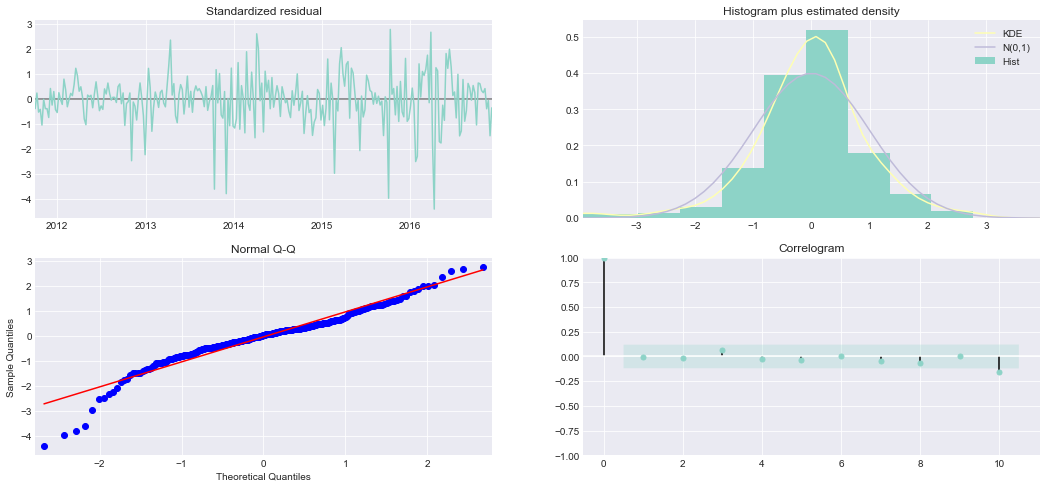

In [338]:
model.plot_diagnostics(figsize=(18, 8))
plt.show()

In [247]:
predict_train = model.predict(start = 0, end = train_index)

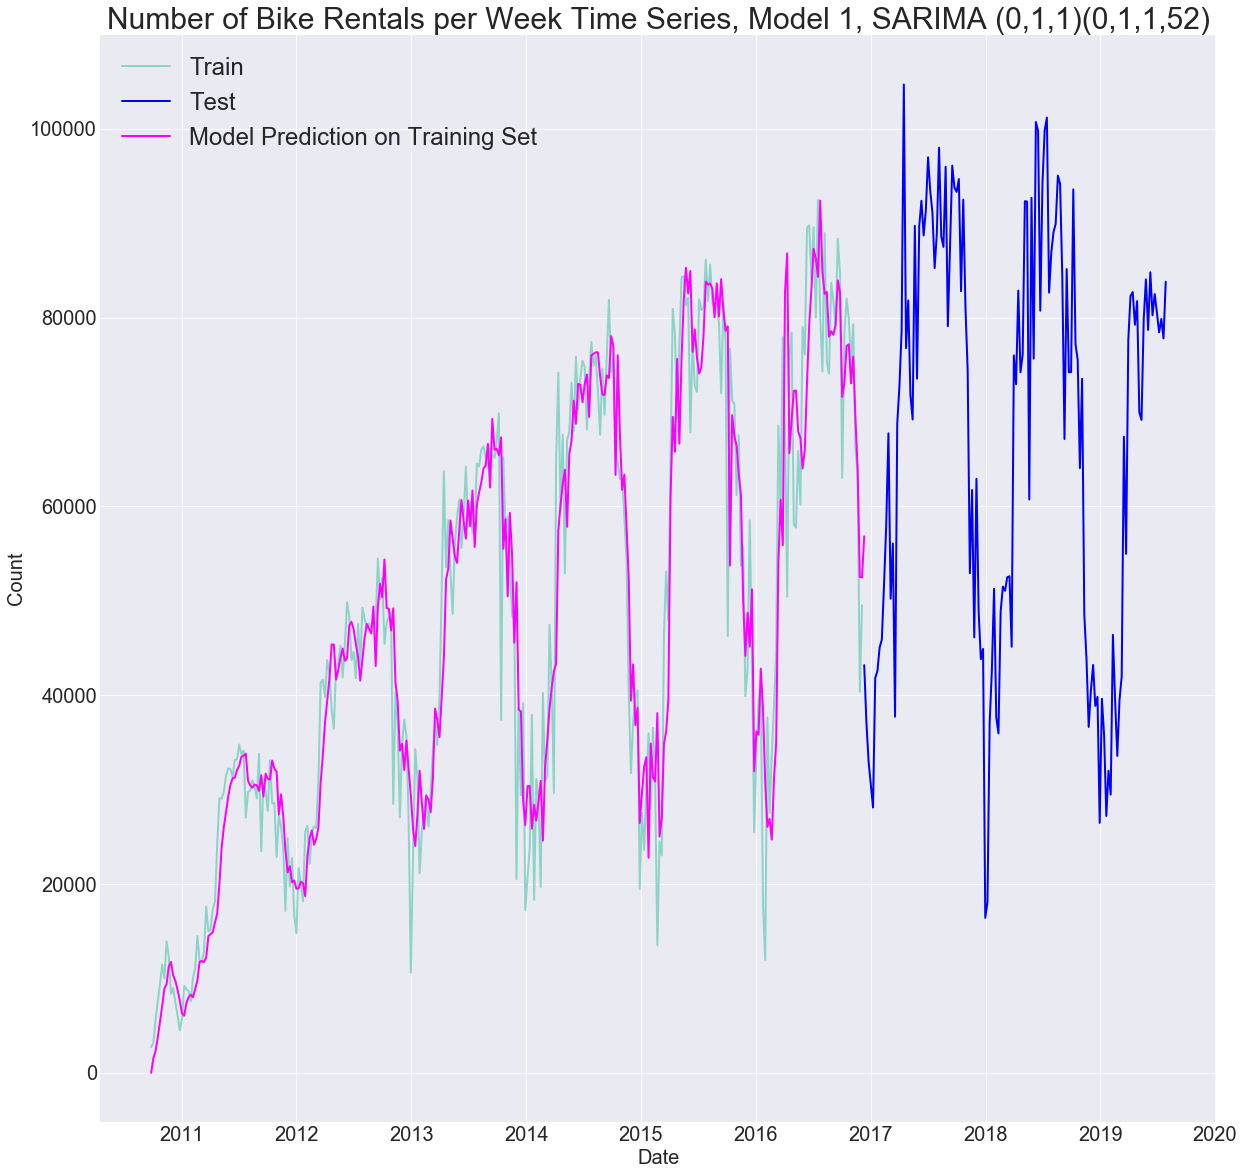

In [339]:
fig = plt.figure(figsize = (20,20))
plt.plot(train_w, lw = 2)
plt.plot(test_w, lw = 2, color = 'blue')
plt.plot(predict_train, lw = 2, color = 'magenta')
plt.xlabel('Date', fontsize = 20);
plt.ylabel('Count', fontsize = 20);
plt.xticks(fontsize = 20);
plt.yticks(fontsize = 20);
plt.legend(['Train','Test', 'Model Prediction on Training Set'],prop={'size': 24})

plt.title('Number of Bike Rentals per Week Time Series, Model 1, SARIMA (0,1,1)(0,1,1,52)', fontsize = 30);

In [340]:
predict_test = model.predict(start = train_index, end = len(master_w))

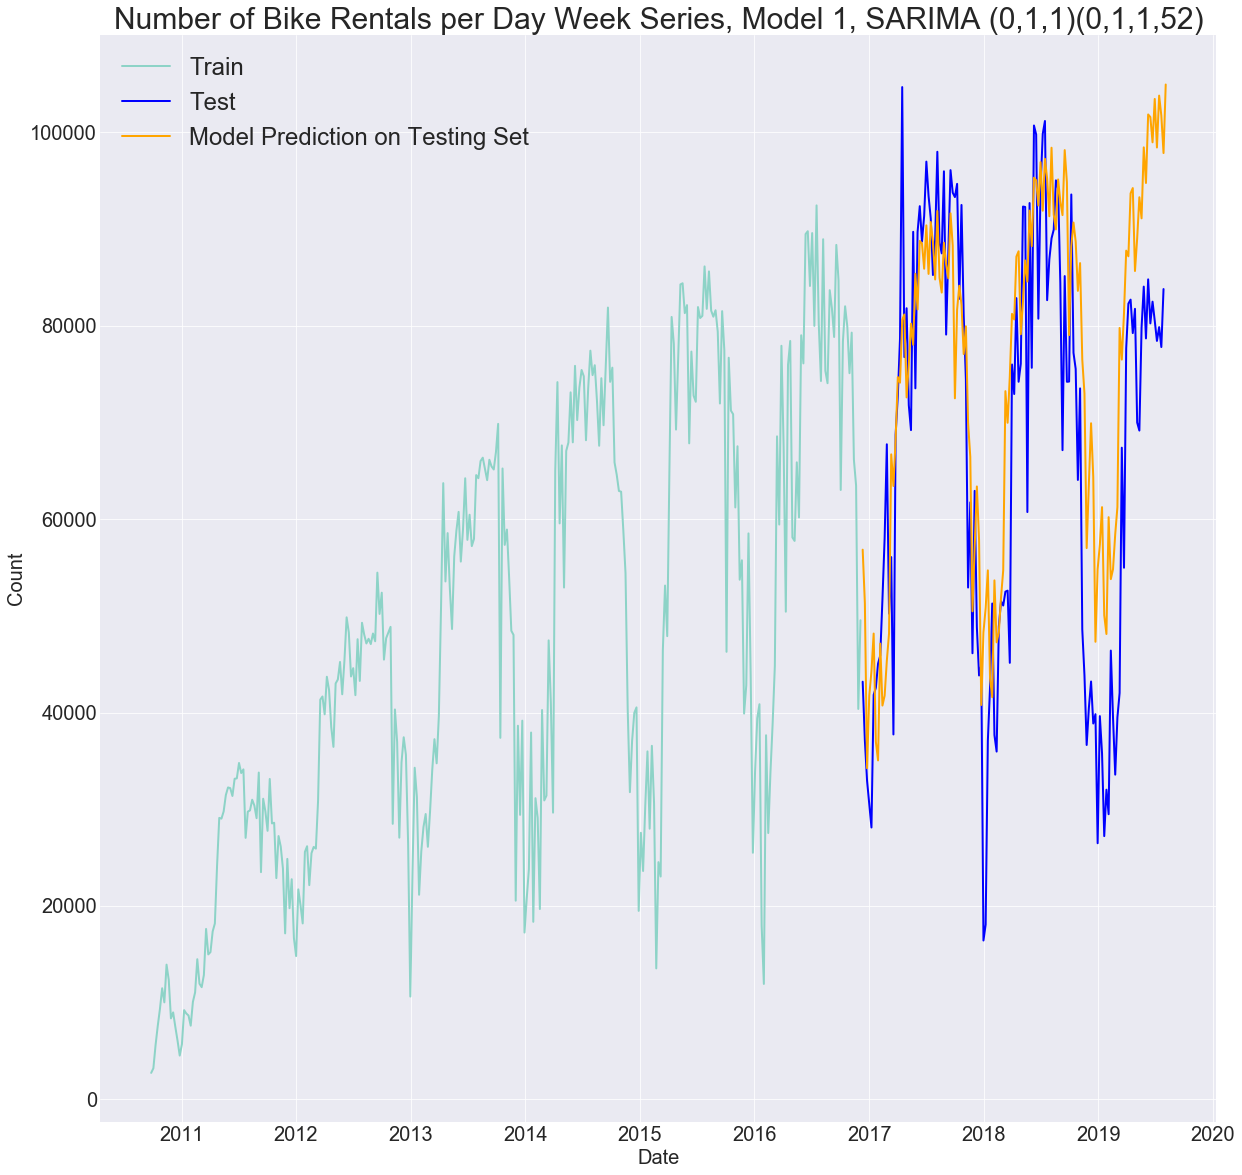

In [341]:
fig = plt.figure(figsize = (20,20))
plt.plot(train_w, lw = 2)
plt.plot(test_w, lw = 2, color = 'blue')
plt.plot(predict_test, lw = 2, color = 'orange')
plt.xlabel('Date', fontsize = 20);
plt.ylabel('Count', fontsize = 20);
plt.xticks(fontsize = 20);
plt.yticks(fontsize = 20);
plt.legend(['Train','Test', 'Model Prediction on Testing Set'],prop={'size': 24})

plt.title('Number of Bike Rentals per Day Week Series, Model 1, SARIMA (0,1,1)(0,1,1,52)', fontsize = 30);

In [373]:
model_train_rmse = np.sqrt(mean_squared_error(train_w['count'],predict_train[:-1]))
model_test_rmse = np.sqrt(mean_squared_error(test_w['count'], predict_test[:-1]))
print(model_train_rmse)
print(model_test_rmse)

7705.710794920863
14890.61458681471


In [375]:
model.params

ma.L1      -5.872733e-01
ma.S.L52   -6.013258e-01
sigma2      6.806127e+07
dtype: float64

In [371]:
mse.compare_mse(model, train_w, test_w)

Training MSE:  59377978.85495991
Testing MSE:  221730402.773059


(59377978.85495991, 221730402.773059)

In [343]:
model_2nd_place = sm.tsa.statespace.SARIMAX(train_w['count'], trend='n', order=(1,1,2), seasonal_order=(0,1,1,52)).fit()
model_2nd_place.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              count   No. Observations:                  324
Model:             SARIMAX(1, 1, 2)x(0, 1, 1, 52)   Log Likelihood               -2835.358
Date:                            Sun, 08 Sep 2019   AIC                           5680.716
Time:                                    17:48:58   BIC                           5698.727
Sample:                                09-26-2010   HQIC                          5687.948
                                     - 12-04-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9101      0.089    -10.226      0.000      -1.085      -0.736
ma.L1          0.3459      0.102      3.389      0.001       0.146       0.546
ma.L2         -0.5847      0.063     -9.318      0.000      -0.708      -0.462
ma.S.L52      -0.5589      0.072     -7.778      0.000      -0.700      -0.418
sigma2      8.931e+07   2.69e-10   3.31e+17      0.000    8.93e+07    8.93e+07
===================================================================================
Ljung-Box (Q):                       56.47   Jarque-Bera (JB):               107.63
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               3.21   Skew:                            -0.73
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.12e+33. Standard errors may be unstable.
"""

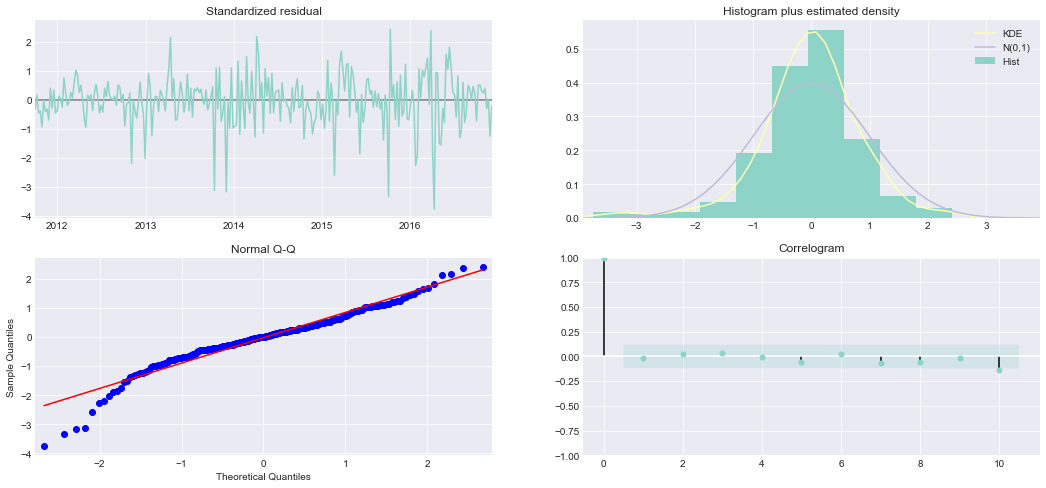

In [344]:
model_2nd_place.plot_diagnostics(figsize=(18, 8))
plt.show()

In [345]:
predict_train_2nd_place = model_2nd_place.predict(start = 0, end = train_index)

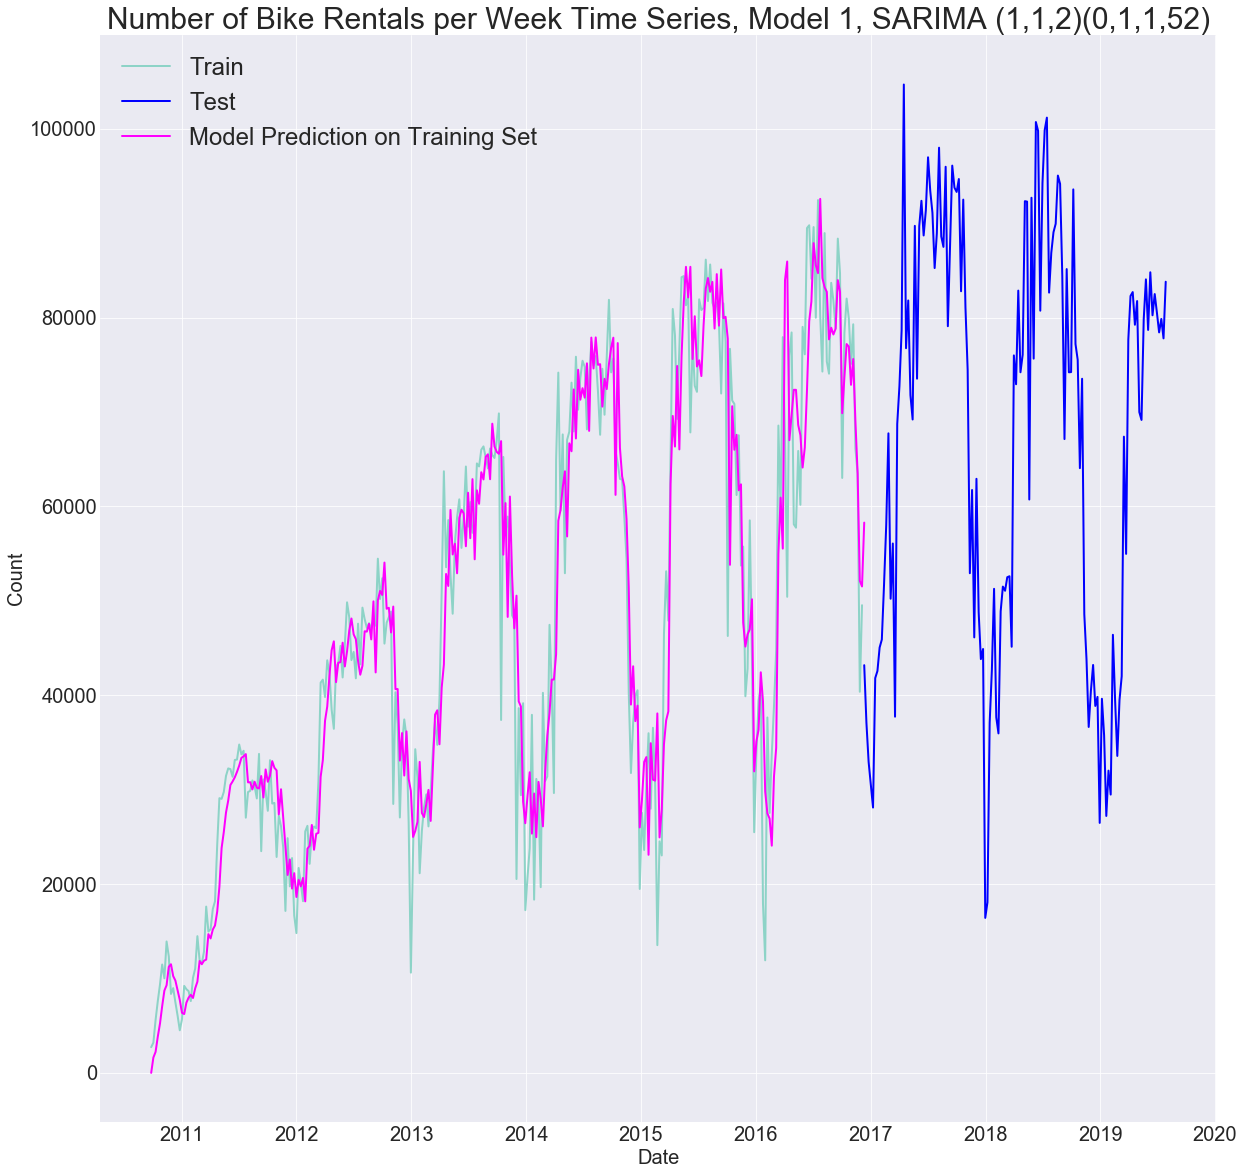

In [346]:
fig = plt.figure(figsize = (20,20))
plt.plot(train_w, lw = 2)
plt.plot(test_w, lw = 2, color = 'blue')
plt.plot(predict_train_2nd_place, lw = 2, color = 'magenta')
plt.xlabel('Date', fontsize = 20);
plt.ylabel('Count', fontsize = 20);
plt.xticks(fontsize = 20);
plt.yticks(fontsize = 20);
plt.legend(['Train','Test', 'Model Prediction on Training Set'],prop={'size': 24})

plt.title('Number of Bike Rentals per Week Time Series, Model 1, SARIMA (1,1,2)(0,1,1,52)', fontsize = 30);

In [347]:
predict_test_2nd_place = model_2nd_place.predict(start = train_index, end = len(master_w))

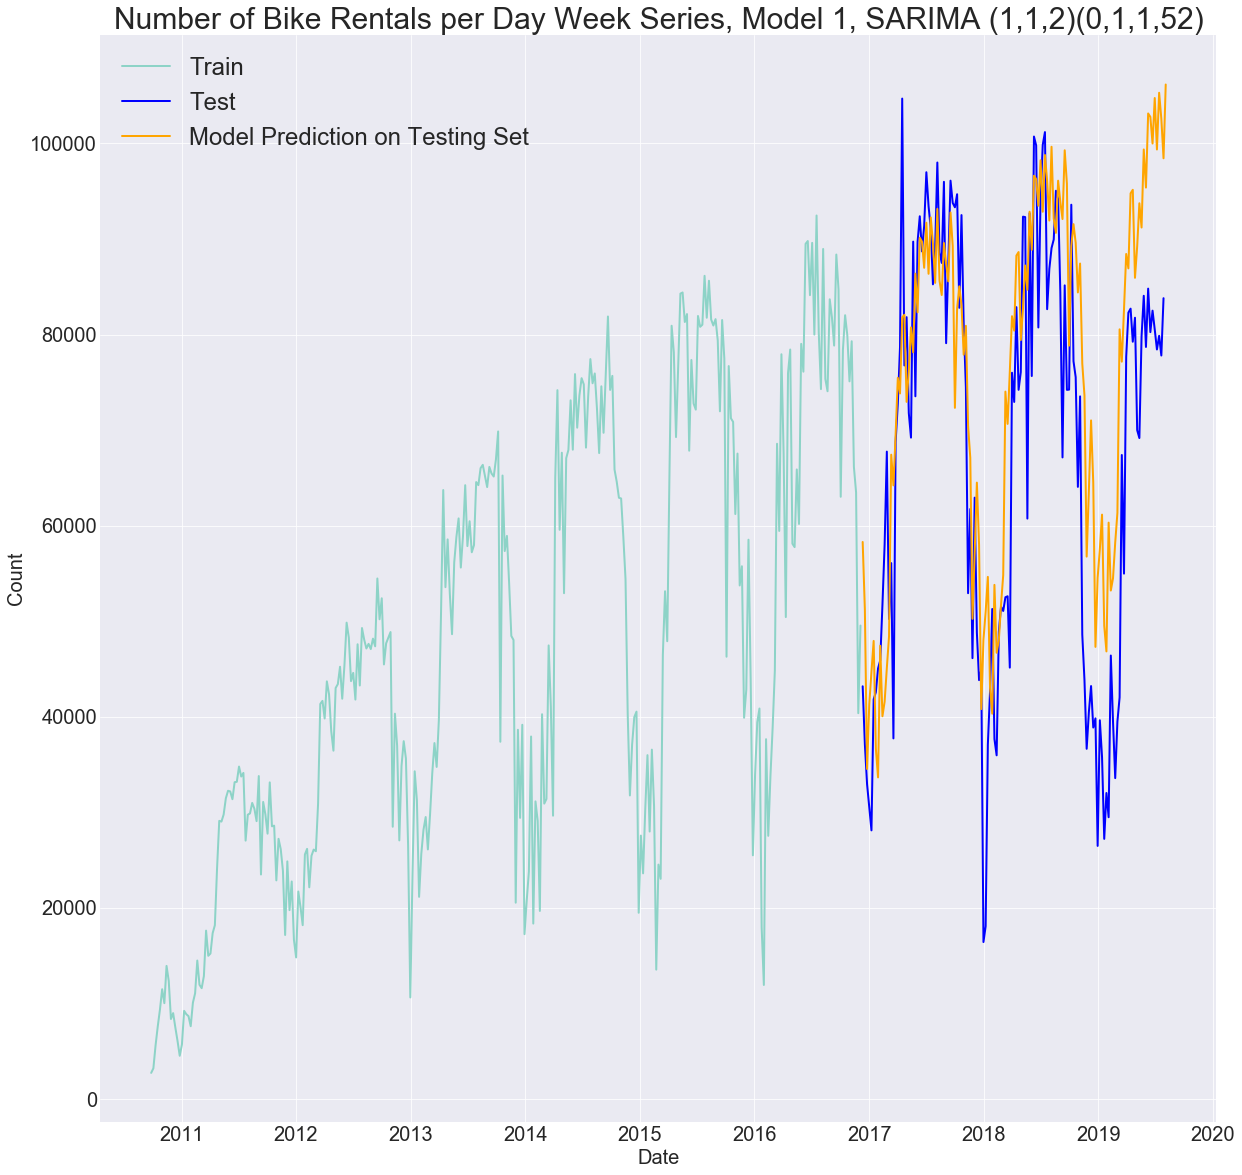

In [348]:
fig = plt.figure(figsize = (20,20))
plt.plot(train_w, lw = 2)
plt.plot(test_w, lw = 2, color = 'blue')
plt.plot(predict_test_2nd_place, lw = 2, color = 'orange')
plt.xlabel('Date', fontsize = 20);
plt.ylabel('Count', fontsize = 20);
plt.xticks(fontsize = 20);
plt.yticks(fontsize = 20);
plt.legend(['Train','Test', 'Model Prediction on Testing Set'],prop={'size': 24})

plt.title('Number of Bike Rentals per Day Week Series, Model 1, SARIMA (1,1,2)(0,1,1,52)', fontsize = 30);

In [349]:
model_2nd_place_train_rmse = np.sqrt(mean_squared_error(train_w['count'],predict_train_2nd_place[:-1]))
model_2nd_place_test_rmse = np.sqrt(mean_squared_error(test_w['count'], predict_test_2nd_place[:-1]))
print(model_2nd_place_train_rmse)
print(model_2nd_place_test_rmse)

7680.535287613968
15182.01264252981


In [350]:
TRAIN = .8
train_index2 = int(len(master_w)*TRAIN) + 1
train_w2 = master_w.iloc[:train_index2]
test_w2 = master_w.iloc[train_index2:]
print(len(train_w2))
print(len(test_w2))

370
92


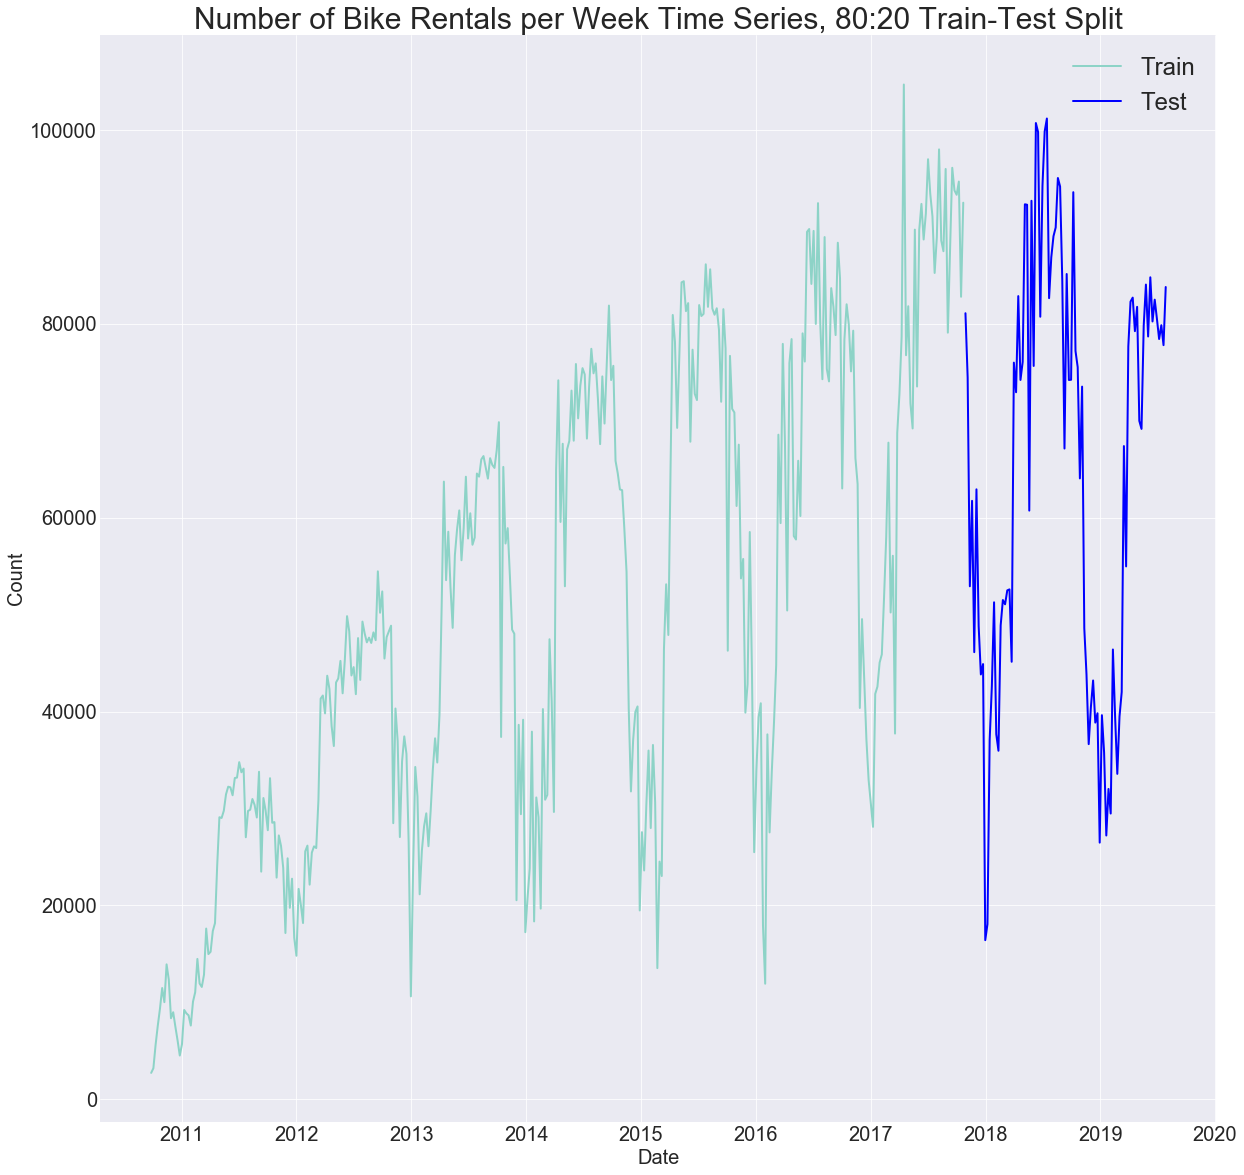

In [351]:
fig = plt.figure(figsize = (20,20))
plt.plot(train_w2, lw = 2)
plt.plot(test_w2, lw = 2, color = 'blue')
plt.xlabel('Date', fontsize = 20);
plt.ylabel('Count', fontsize = 20);
plt.xticks(fontsize = 20);
plt.yticks(fontsize = 20);
plt.legend(['Train','Test'],prop={'size': 24})

plt.title('Number of Bike Rentals per Week Time Series, 80:20 Train-Test Split', fontsize = 30);

In [260]:
automodel_d0_D1_2 = auto_arima(train_w2['count'], start_p=0, start_q=0, max_p=3, max_q=3, m=52,start_P=0, seasonal=True,
                                            d=0, D=1, trace=True, error_action='ignore',suppress_warnings=True,
                                            stepwise=True)

Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 1, 52); AIC=6811.359, BIC=6822.645, Fit time=6.904 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 52); AIC=6810.881, BIC=6818.405, Fit time=0.650 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 52); AIC=6732.853, BIC=6747.901, Fit time=8.605 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 52); AIC=6765.440, BIC=6780.488, Fit time=8.539 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 1, 0, 52); AIC=6754.527, BIC=6765.813, Fit time=0.993 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 1, 0, 52); AIC=6721.591, BIC=6740.401, Fit time=27.725 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 1, 1, 52); AIC=6721.558, BIC=6744.131, Fit time=43.751 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(2, 1, 1, 52); AIC=6815.321, BIC=6834.131, Fit time=30.652 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(2, 1, 1, 52); AIC=6697.265, BIC=6723.599, Fit time=53.779 seconds
Fit ARIMA: order=(2, 0, 

In [261]:
automodel_d1_D1_2 = auto_arima(train_w2['count'], start_p=0, start_q=0, max_p=3, max_q=3, m=52,start_P=0, seasonal=True,
                                            d=1, D=1, trace=True, error_action='ignore',suppress_warnings=True,
                                            stepwise=True)

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 52); AIC=6764.966, BIC=6776.243, Fit time=11.824 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=6845.188, BIC=6852.706, Fit time=1.336 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=6733.753, BIC=6748.789, Fit time=6.153 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 52); AIC=6680.139, BIC=6695.175, Fit time=5.713 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 52); AIC=6682.041, BIC=6700.835, Fit time=15.615 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 52); AIC=6749.479, BIC=6760.756, Fit time=1.319 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 52); AIC=6682.044, BIC=6700.838, Fit time=23.544 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 52); AIC=6684.039, BIC=6706.592, Fit time=54.770 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 52); AIC=6681.963, BIC=6700.757, Fit time=8.870 seconds
Fit ARIMA: order=(0, 1, 

In [263]:
print('d = 0, D = 1: ',automodel_d0_D1_2.order, automodel_d0_D1_2.seasonal_order, ': ',automodel_d0_D1_2.aic())
print('d = 1: D = 1: ',automodel_d1_D1_2.order, automodel_d1_D1_2.seasonal_order, ': ',automodel_d1_D1_2.aic())

d = 0, D = 1:  (3, 0, 2) (2, 1, 0, 52) :  6687.217438370302
d = 1: D = 1:  (1, 1, 2) (0, 1, 1, 52) :  6663.606082494256


In [352]:
model2 = sm.tsa.statespace.SARIMAX(train_w2['count'], trend='n', order=(1,1,2), seasonal_order=(0,1,1,52)).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              count   No. Observations:                  370
Model:             SARIMAX(1, 1, 2)x(0, 1, 1, 52)   Log Likelihood               -3325.851
Date:                            Sun, 08 Sep 2019   AIC                           6661.702
Time:                                    17:50:19   BIC                           6680.496
Sample:                                09-26-2010   HQIC                          6669.209
                                     - 10-22-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9976      0.170     -5.876      0.000      -1.330      -0.665
ma.L1          0.4183      0.190      2.200      0.028       0.046       0.791
ma.L2         -0.5758      0.121     -4.749      0.000      -0.813      -0.338
ma.S.L52      -0.7063      0.043    -16.537      0.000      -0.790      -0.623
sigma2      7.239e+07   8.33e-09   8.69e+15      0.000    7.24e+07    7.24e+07
===================================================================================
Ljung-Box (Q):                       55.45   Jarque-Bera (JB):                73.02
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               3.93   Skew:                            -0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.42e+31. Standard errors may be unstable.
"""

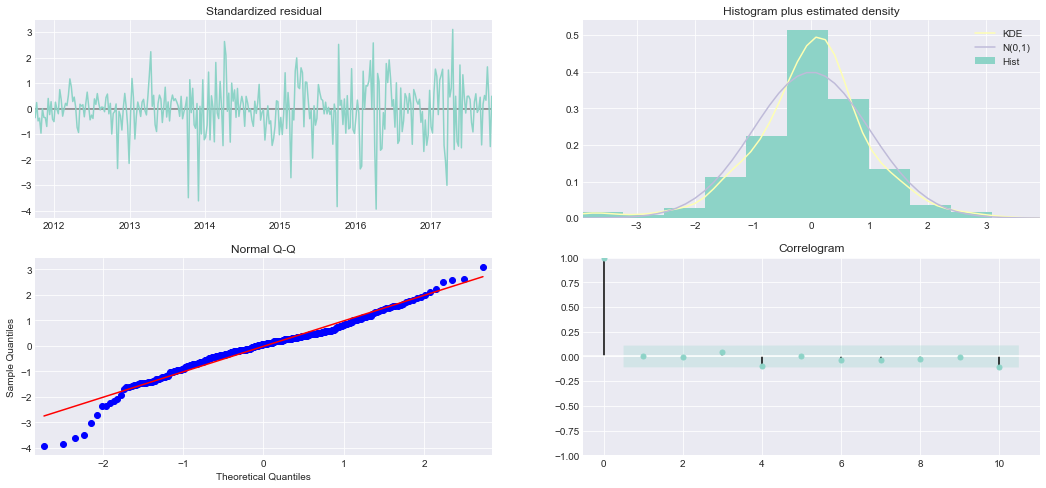

In [353]:
model2.plot_diagnostics(figsize=(18, 8))
plt.show()

In [354]:
predict_train2 = model2.predict(start = 0, end = train_index2)

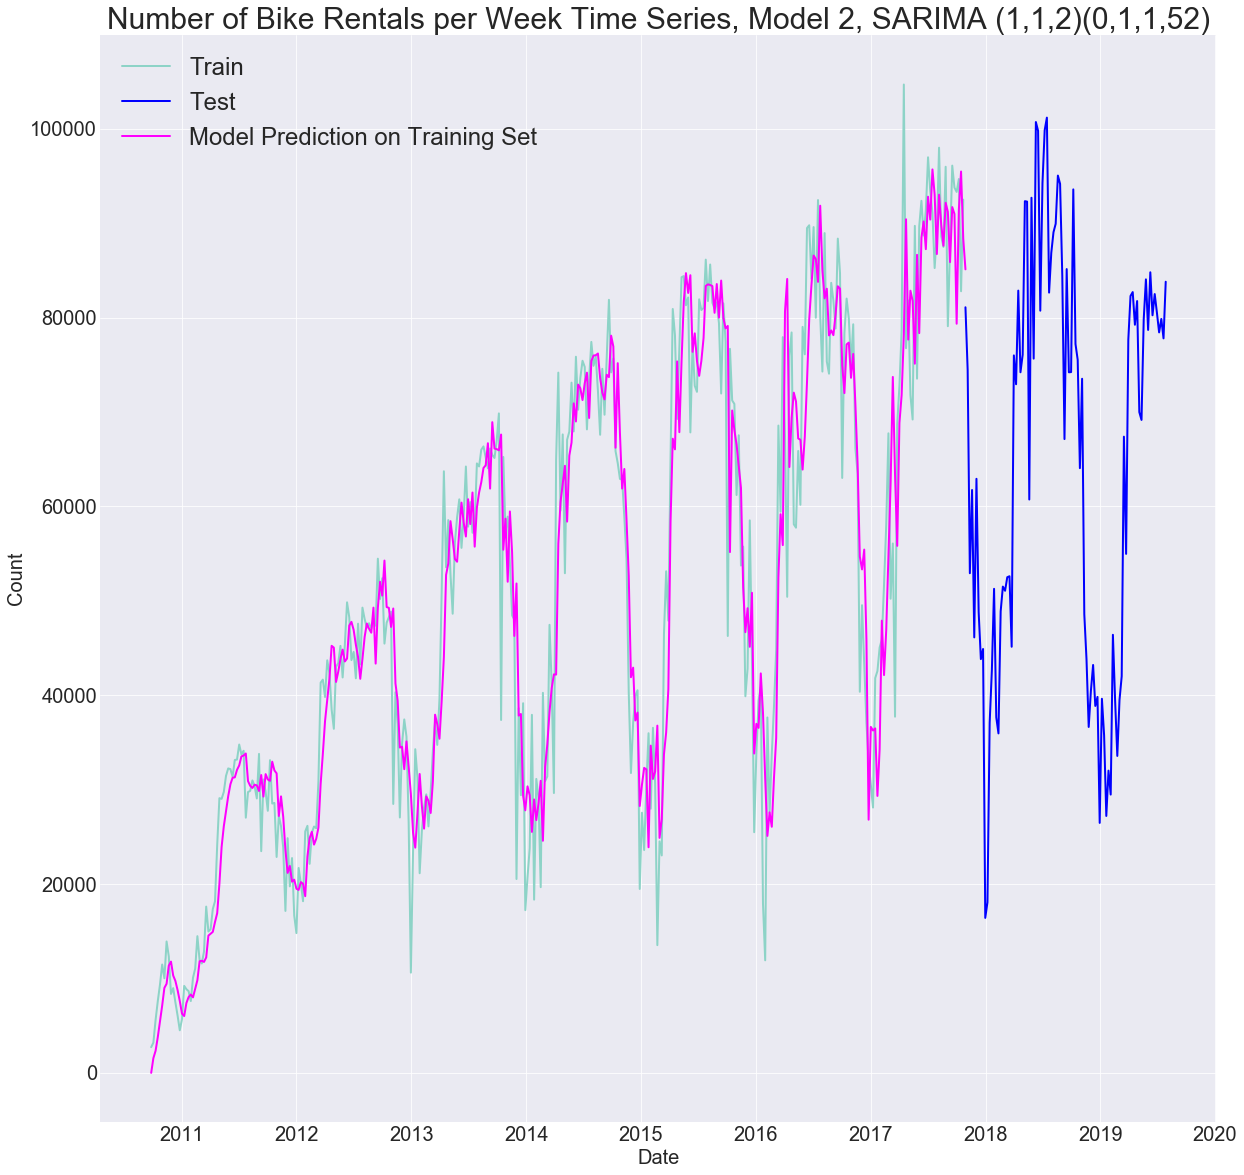

In [355]:
fig = plt.figure(figsize = (20,20))
plt.plot(train_w2, lw = 2)
plt.plot(test_w2, lw = 2, color = 'blue')
plt.plot(predict_train2, lw = 2, color = 'magenta')
plt.xlabel('Date', fontsize = 20);
plt.ylabel('Count', fontsize = 20);
plt.xticks(fontsize = 20);
plt.yticks(fontsize = 20);
plt.legend(['Train','Test', 'Model Prediction on Training Set'],prop={'size': 24})

plt.title('Number of Bike Rentals per Week Time Series, Model 2, SARIMA (1,1,2)(0,1,1,52)', fontsize = 30);

In [268]:
predict_test2 = model2.predict(start = train_index2, end = len(master_w))

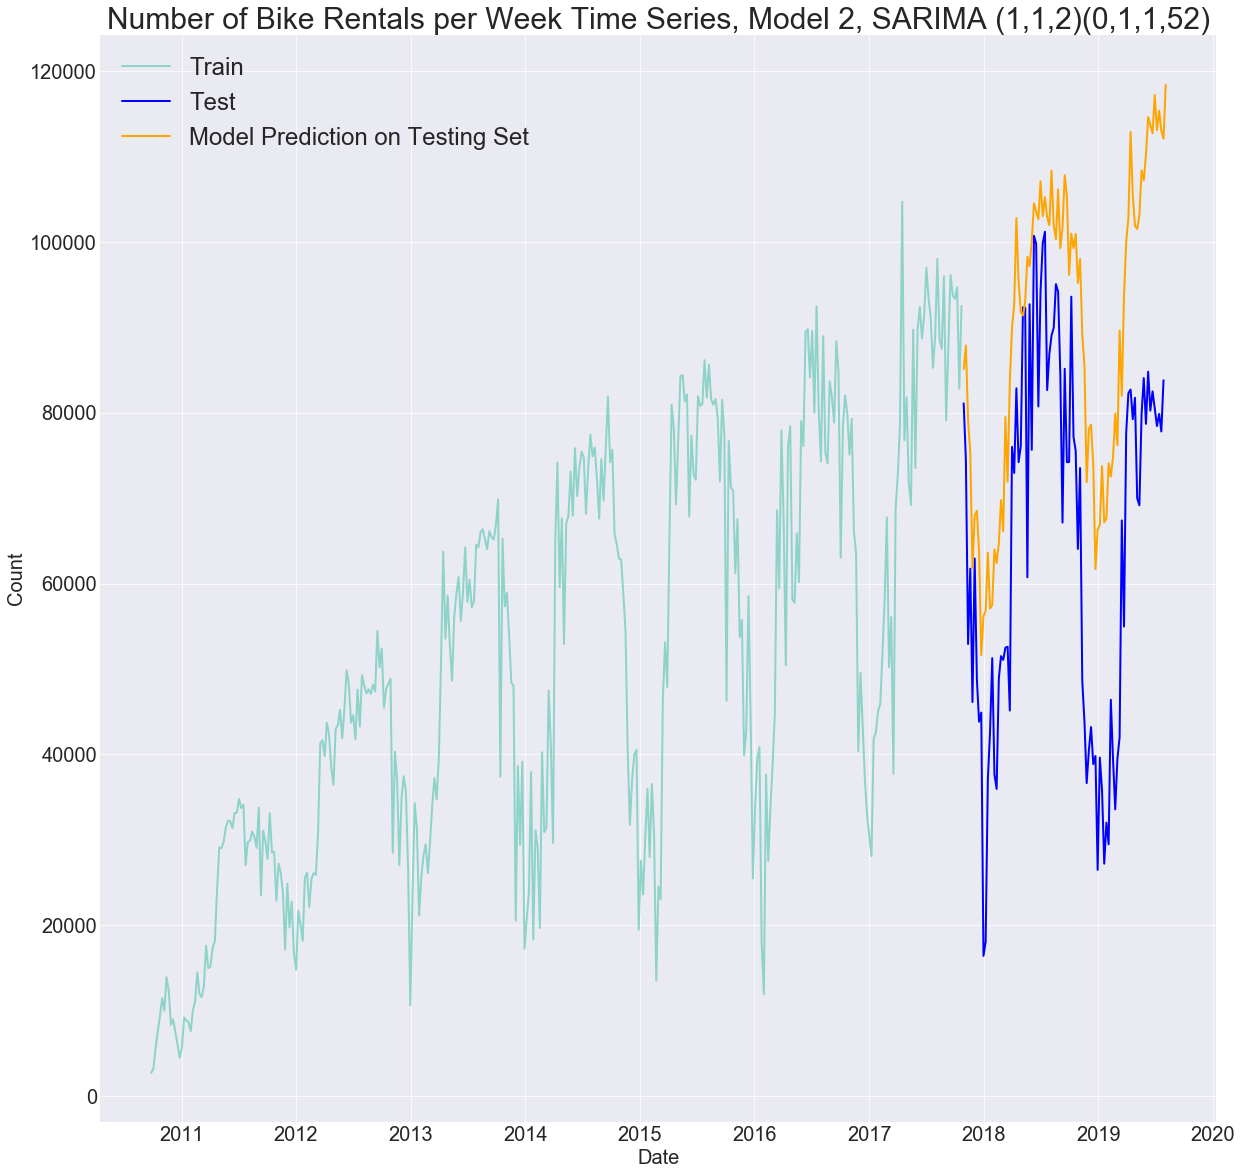

In [356]:
fig = plt.figure(figsize = (20,20))
plt.plot(train_w2, lw = 2)
plt.plot(test_w2, lw = 2, color = 'blue')
plt.plot(predict_test2, lw = 2, color = 'orange')
plt.xlabel('Date', fontsize = 20);
plt.ylabel('Count', fontsize = 20);
plt.xticks(fontsize = 20);
plt.yticks(fontsize = 20);
plt.legend(['Train','Test', 'Model Prediction on Testing Set'],prop={'size': 24})

plt.title('Number of Bike Rentals per Week Time Series, Model 2, SARIMA (1,1,2)(0,1,1,52)', fontsize = 30);

In [357]:
model2_train_rmse = np.sqrt(mean_squared_error(train_w2['count'],predict_train2[:-1]))
model2_test_rmse = np.sqrt(mean_squared_error(test_w2['count'], predict_test2[:-1]))
print(model2_train_rmse)
print(model2_test_rmse)

8068.122598736574
26788.987367565685


In [358]:
TRAIN = .6
train_index3 = int(len(master_w)*TRAIN) + 1
train_w3 = master_w.iloc[:train_index3]
test_w3 = master_w.iloc[train_index3:]
print(len(train_w3))
print(len(test_w3))

278
184


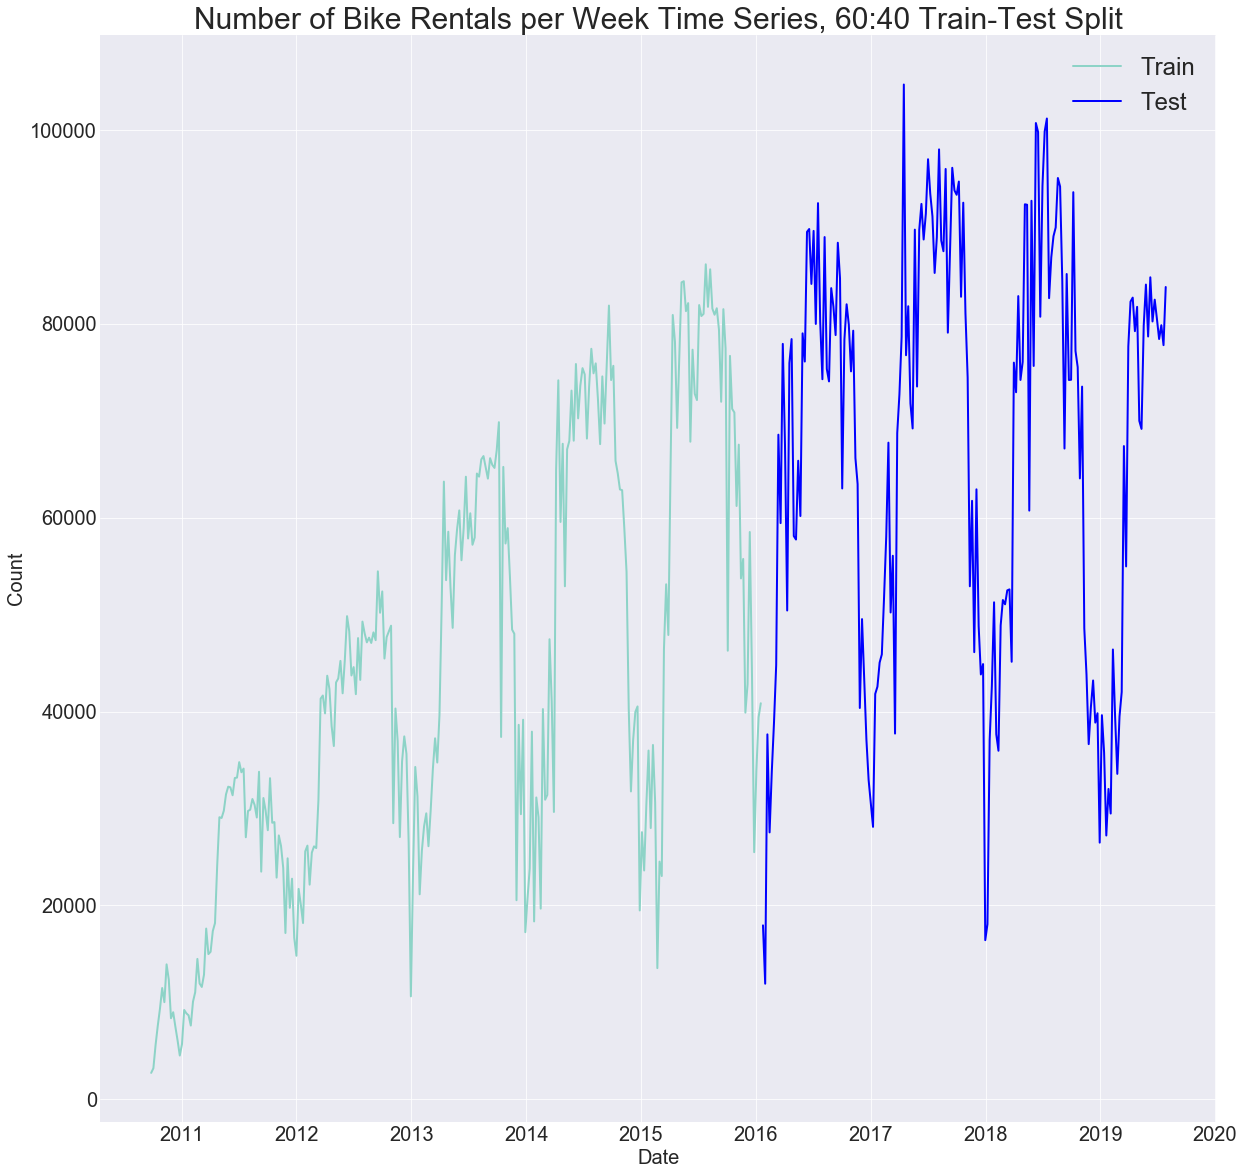

In [359]:
fig = plt.figure(figsize = (20,20))
plt.plot(train_w3, lw = 2)
plt.plot(test_w3, lw = 2, color = 'blue')
plt.xlabel('Date', fontsize = 20);
plt.ylabel('Count', fontsize = 20);
plt.xticks(fontsize = 20);
plt.yticks(fontsize = 20);
plt.legend(['Train','Test'],prop={'size': 24})

plt.title('Number of Bike Rentals per Week Time Series, 60:40 Train-Test Split', fontsize = 30);

In [272]:
automodel_d0_D1_3 = auto_arima(train_w3['count'], start_p=0, start_q=0, max_p=3, max_q=3, m=52,start_P=0, seasonal=True,
                                            d=0, D=1, trace=True, error_action='ignore',suppress_warnings=True,
                                            stepwise=True)

Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 1, 52); AIC=4891.456, BIC=4901.718, Fit time=8.572 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 52); AIC=4772.163, BIC=4779.004, Fit time=0.394 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 52); AIC=4740.045, BIC=4753.727, Fit time=8.308 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 52); AIC=4757.897, BIC=4771.580, Fit time=8.707 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 1, 0, 52); AIC=4743.431, BIC=4753.693, Fit time=1.049 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 1, 0, 52); AIC=4733.692, BIC=4750.795, Fit time=33.656 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 1, 1, 52); AIC=4735.479, BIC=4756.002, Fit time=92.760 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(2, 1, 0, 52); AIC=4774.893, BIC=4788.575, Fit time=15.661 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(2, 1, 0, 52); AIC=4697.331, BIC=4717.854, Fit time=34.349 seconds
Fit ARIMA: order=(2, 0, 

In [273]:
automodel_d1_D1_3 = auto_arima(train_w3['count'], start_p=0, start_q=0, max_p=3, max_q=3, m=52,start_P=0, seasonal=True,
                                            d=1, D=1, trace=True, error_action='ignore',suppress_warnings=True,
                                            stepwise=True)

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 52); AIC=4758.378, BIC=4768.626, Fit time=8.689 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=4811.230, BIC=4818.062, Fit time=1.625 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=4705.977, BIC=4719.641, Fit time=4.239 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 52); AIC=4677.015, BIC=4690.679, Fit time=9.081 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 52); AIC=4678.796, BIC=4695.876, Fit time=7.835 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 52); AIC=4703.254, BIC=4713.502, Fit time=0.647 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 52); AIC=4676.231, BIC=4693.312, Fit time=8.318 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 

In [274]:
print('d = 0, D = 1: ',automodel_d0_D1_3.order, automodel_d0_D1_3.seasonal_order, ': ',automodel_d0_D1_3.aic())
print('d = 1: D = 1: ',automodel_d1_D1_3.order, automodel_d1_D1_3.seasonal_order, ': ',automodel_d1_D1_3.aic())

d = 0, D = 1:  (3, 0, 3) (2, 1, 0, 52) :  4686.749537374184
d = 1: D = 1:  (1, 1, 1) (0, 1, 1, 52) :  4676.231452165906


In [360]:
model3 = sm.tsa.statespace.SARIMAX(train_w3['count'], trend='n', order=(1,1,1), seasonal_order=(0,1,1,52)).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              count   No. Observations:                  278
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 52)   Log Likelihood               -2333.189
Date:                            Sun, 08 Sep 2019   AIC                           4674.377
Time:                                    17:51:57   BIC                           4688.042
Sample:                                09-26-2010   HQIC                          4679.892
                                     - 01-17-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1472      0.132     -1.112      0.266      -0.407       0.112
ma.L1         -0.5368      0.123     -4.370      0.000      -0.778      -0.296
ma.S.L52      -0.5034      0.090     -5.591      0.000      -0.680      -0.327
sigma2      7.134e+07   8.02e-10   8.89e+16      0.000    7.13e+07    7.13e+07
===================================================================================
Ljung-Box (Q):                       68.27   Jarque-Bera (JB):               138.17
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.47   Skew:                            -0.75
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.62e+33. Standard errors may be unstable.
"""

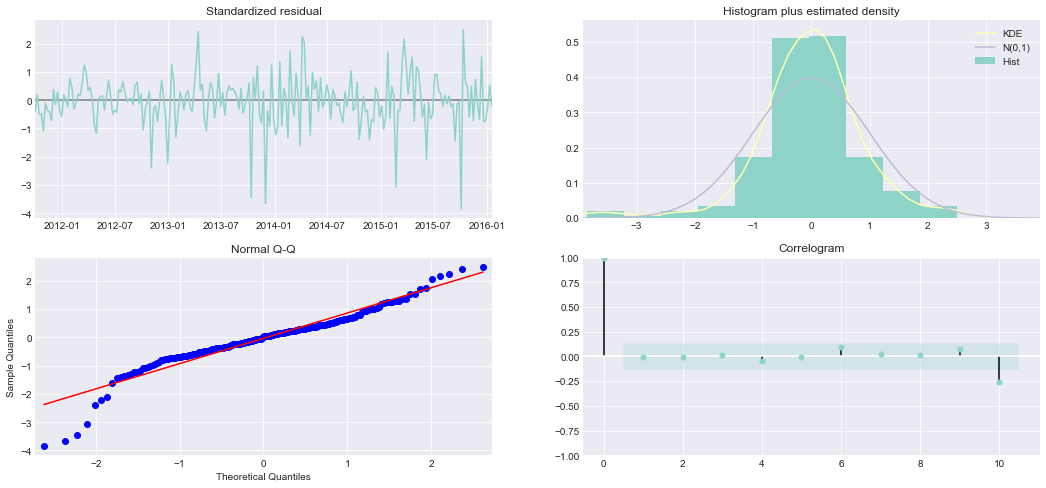

In [361]:
model3.plot_diagnostics(figsize=(18, 8))
plt.show()

In [362]:
predict_train3 = model3.predict(start = 0, end = train_index3)

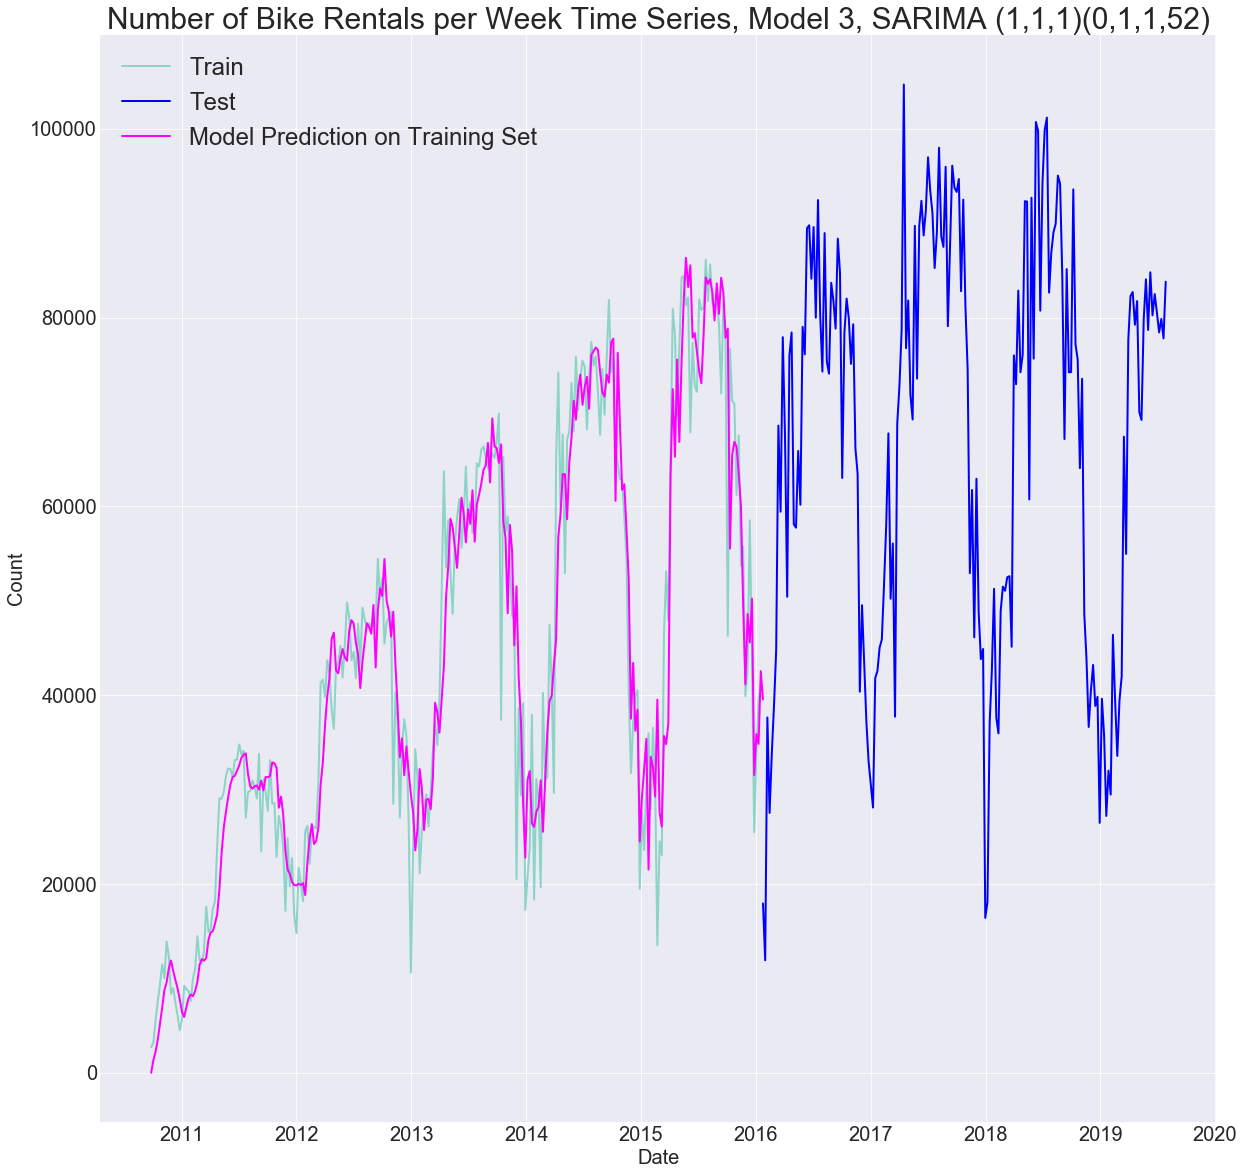

In [363]:
fig = plt.figure(figsize = (20,20))
plt.plot(train_w3, lw = 2)
plt.plot(test_w3, lw = 2, color = 'blue')
plt.plot(predict_train3, lw = 2, color = 'magenta')
plt.xlabel('Date', fontsize = 20);
plt.ylabel('Count', fontsize = 20);
plt.xticks(fontsize = 20);
plt.yticks(fontsize = 20);
plt.legend(['Train','Test', 'Model Prediction on Training Set'],prop={'size': 24})

plt.title('Number of Bike Rentals per Week Time Series, Model 3, SARIMA (1,1,1)(0,1,1,52)', fontsize = 30);

In [364]:
predict_test3 = model3.predict(start = train_index3, end = len(master_w))

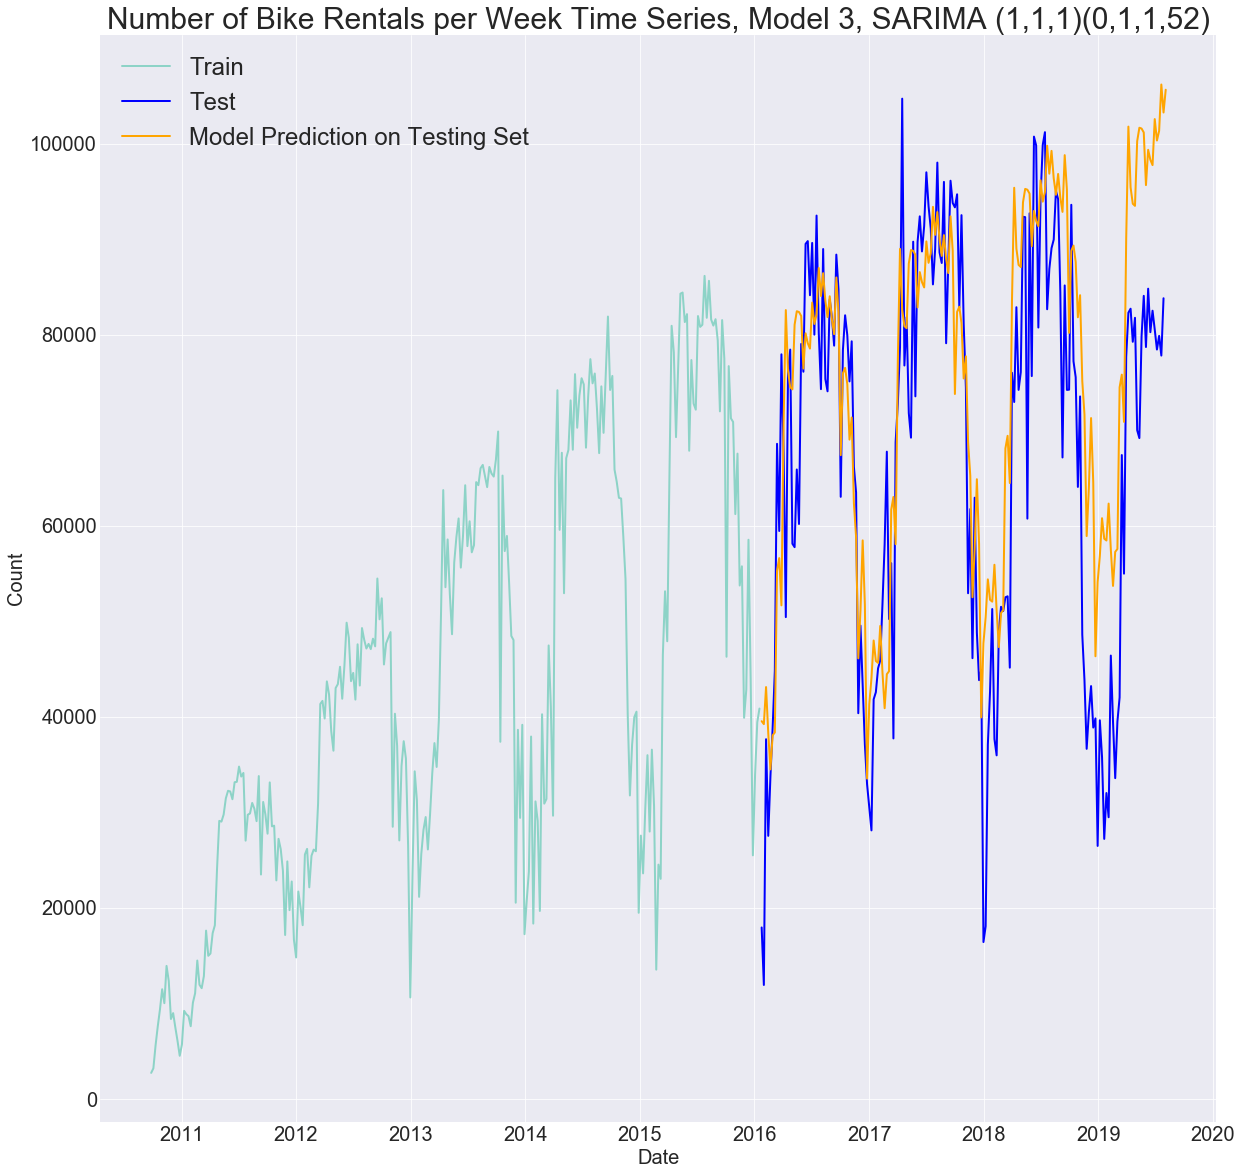

In [365]:
fig = plt.figure(figsize = (20,20))
plt.plot(train_w3, lw = 2)
plt.plot(test_w3, lw = 2, color = 'blue')
plt.plot(predict_test3, lw = 2, color = 'orange')
plt.xlabel('Date', fontsize = 20);
plt.ylabel('Count', fontsize = 20);
plt.xticks(fontsize = 20);
plt.yticks(fontsize = 20);
plt.legend(['Train','Test', 'Model Prediction on Testing Set'],prop={'size': 24})

plt.title('Number of Bike Rentals per Week Time Series, Model 3, SARIMA (1,1,1)(0,1,1,52)', fontsize = 30);

In [366]:
model3_train_rmse = np.sqrt(mean_squared_error(train_w3['count'],predict_train3[:-1]))
model3_test_rmse = np.sqrt(mean_squared_error(test_w3['count'], predict_test3[:-1]))
print(model3_train_rmse)
print(model3_test_rmse)

6985.344686318262
14664.024380494211


In [315]:
import pickle
pickle.dump(automodel_d0_D0, open( "automodel_d0_D0.p", "wb" ))
pickle.dump(automodel_d1_D0, open( "automodel_d1_D0.p", "wb" ))
pickle.dump(automodel_d0_D1, open( "automodel_d0_D1.p", "wb" ))
pickle.dump(automodel_d1_D1, open( "automodel_d1_D1.p", "wb" ))
pickle.dump(automodel_d0_D1_2, open( "automodel_d0_D1_2.p", "wb" ))
pickle.dump(automodel_d1_D1_2, open( "automodel_d1_D1_2.p", "wb" ))
pickle.dump(automodel_d0_D1_3, open( "automodel_d0_D1_3.p", "wb" ))
pickle.dump(automodel_d1_D1_3, open( "automodel_d1_D1_3.p", "wb" ))

In [336]:
automodel_d0_D0 = pickle.load(open("automodel_d0_D0.p", "rb"))
automodel_d1_D0 = pickle.load(open("automodel_d1_D0.p", "rb"))
automodel_d0_D1 = pickle.load(open("automodel_d0_D1.p", "rb"))
automodel_d1_D1 = pickle.load(open("automodel_d1_D1.p", "rb"))
automodel_d0_D1_2 = pickle.load(open("automodel_d0_D1_2.p", "rb"))
automodel_d1_D1_2 = pickle.load(open("automodel_d1_D1_2.p", "rb"))
automodel_d0_D1_3 = pickle.load(open("automodel_d0_D1_3.p", "rb"))
automodel_d1_D1_3 = pickle.load(open("automodel_d1_D1_3.p", "rb"))